In [1]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('Day32.csv',index_col='client_id')

In [40]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [9]:
df.shape

(443, 7)

In [10]:
df.describe()

,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000
mean,7982.311512,0.534989,11017.101580,3.217156
std,4172.891992,0.499338,581.826222,2.397168
min,559.000000,0.000000,10009.000000,0.010000
25%,4232.500000,0.000000,10507.500000,1.220000
50%,8320.000000,1.000000,11033.000000,2.780000
75%,11739.000000,1.000000,11526.000000,4.750000
max,14971.000000,1.000000,11991.000000,12.620000


In [11]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [12]:
 
# Convert Load_id to object datatype
df['loan_id'] = df['loan_id'].astype('object')

# Coonvert repaid to object/categorical
df['repaid'] = df['repaid'].astype('category')

# Convert loan_start & loan_end to date type
df['loan_start'] = pd.to_datetime(df['loan_start'], format='%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format='%Y-%m-%d')

In [15]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

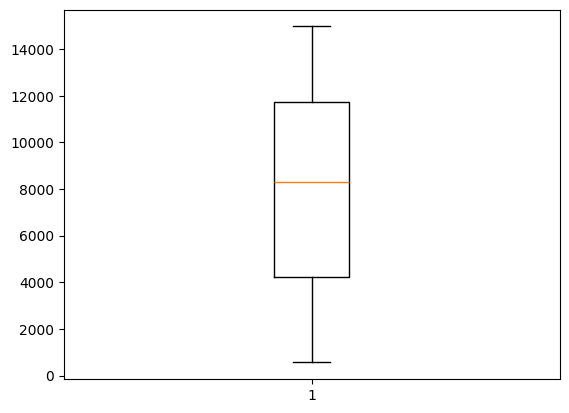

In [18]:
plt.boxplot(df.loan_amount)
plt.show()

<Axes: >

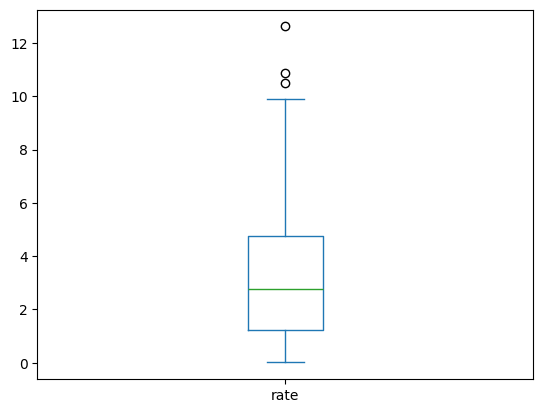

In [19]:
df.rate.plot(kind='box')

<Axes: ylabel='rate'>

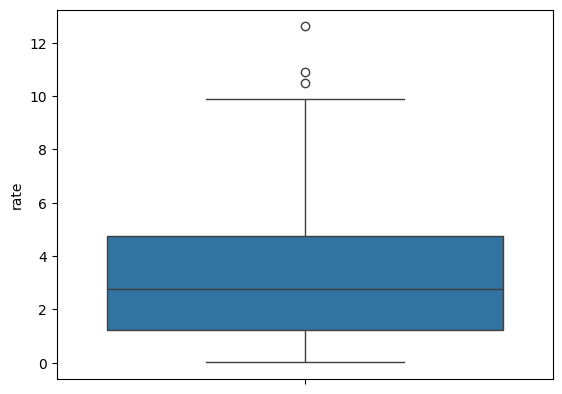

In [22]:
sns.boxplot(df.rate)

In [32]:
df1 = df[['loan_amount','rate']]
df1

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13
...,...,...
26945,12963,2.46
26945,1728,5.27
26945,9329,5.65


In [44]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [33]:

scale = StandardScaler()
df1 = scale.fit_transform(df1)


In [34]:
df1

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

In [42]:
label = LabelEncoder()
df['loan_type'] = label.fit_transform(df['loan_type'])

In [43]:
df

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,2,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,1,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,2,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,0,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,1,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...
26945,3,12963,0,10330,2001-11-26,2004-06-11,2.46
26945,1,1728,1,10248,2004-01-27,2005-06-21,5.27
26945,3,9329,0,10154,2001-12-17,2004-07-22,5.65
